**A Titanic kaggle competions**

In [ ]:
#importimg labries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn import metrics
from sklearn import preprocessing #normalizers

In [ ]:
#reading the data set
train_df = pd.read_csv("/content/train.csv",index_col = 'PassengerId')
test_df = pd.read_csv("/content/test.csv", index_col = 'PassengerId')
Survived = train_df['Survived'].copy()
train_df = train_df.drop('Survived', axis = 1)

In [ ]:
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [ ]:
#to check for the missing values
print(train_df.isnull().sum())

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [ ]:
#displaying the shape of the data
train_df.shape, test_df.shape

((891, 10), (418, 10))

In [ ]:
# Combine Test and Train to perform feature engineering all at once
df = pd.concat([test_df, train_df])
traindex = train_df.index
testdex = test_df.index
print(test_df.equals(df.loc[testdex,:]))
print(train_df.equals(df.loc[traindex,:]))
del train_df
del test_df

True
True


In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Proportion Missing Table:That is dealing with the missing values
settypes=df.dtypes.reset_index()
def missing(df):
    missing = df.isnull().sum(axis=0).reset_index()
    missing.columns = ['column_name', 'missing_count']
    missing['missing_ratio'] = missing['missing_count'] / df.shape[0]
    missing = pd.merge(missing,settypes, left_on='column_name', right_on='index',how='inner')
    missing = missing.loc[(missing['missing_ratio']>0)]\
    .sort_values(by=["missing_ratio"], ascending=False)
    return missing

In [ ]:
mis = missing(df)
mis

,column_name,missing_count,missing_ratio,index,0
8,Cabin,1014,0.774637,Cabin,object
3,Age,263,0.200917,Age,float64
9,Embarked,2,0.001528,Embarked,object
7,Fare,1,0.000764,Fare,float64


In [ ]:
#Adding new values or variables enginerring to the data 
# Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Name Length
df['Name_length'] = df['Name'].apply(len)
# Is Alone?
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Name_length,IsAlone
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,16,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,32,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,25,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,16,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,44,0


In [ ]:
#handling the title of the names by extracting them in one column
df['Title']=0
df['Title']=df.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col',
                         'Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Name_length,IsAlone,Title
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,16,1,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,32,0,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,25,1,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,16,1,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,44,0,Mrs


In [ ]:
#handling the missing values of the age by obtaining the mean of the age 
df.loc[(df.Age.isnull())&(df.Title=='Mr'),'Age']= df.Age[df.Title=="Mr"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Mrs'),'Age']= df.Age[df.Title=="Mrs"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Master'),'Age']= df.Age[df.Title=="Master"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Miss'),'Age']= df.Age[df.Title=="Miss"].mean()
df.loc[(df.Age.isnull())&(df.Title=='Other'),'Age']= df.Age[df.Title=="Other"].mean()
df = df.drop('Name', axis=1)

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Name_length,IsAlone,Title
PassengerId,,,,,,,,,,,,,
892,3,male,34.5,0,0,330911,7.8292,NaN,Q,1,16,1,Mr
893,3,female,47.0,1,0,363272,7.0000,NaN,S,2,32,0,Mrs
894,2,male,62.0,0,0,240276,9.6875,NaN,Q,1,25,1,Mr
895,3,male,27.0,0,0,315154,8.6625,NaN,S,1,16,1,Mr
896,3,female,22.0,1,1,3101298,12.2875,NaN,S,3,44,0,Mrs


In [ ]:
# Fill NA(replacing )
# Categoricals Variable
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])
# Continuous Variable
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [ ]:
#converting the object type to int for sex, Emberked, 
# Assign Binary to Sex str
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
# Title
#df['Title'] = df['Title'].map( {'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master':3, 'Rare': 4} ).astype(int)
# Embarked
df['Embarked'] = df['Embarked'].map( {'Q': 0, 'S': 1, 'C': 2} ).astype(int)

# Get Rid of Ticket and Cabin Variable
df= df.drop(['Ticket', 'Cabin'], axis=1)

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Name_length,IsAlone,Title
PassengerId,,,,,,,,,,,
892,3,0,34.5,0,0,7.8292,0,1,16,1,Mr
893,3,1,47.0,1,0,7.0000,1,2,32,0,Mrs
894,2,0,62.0,0,0,9.6875,0,1,25,1,Mr
895,3,0,27.0,0,0,8.6625,1,1,16,1,Mr
896,3,1,22.0,1,1,12.2875,1,3,44,0,Mrs


In [ ]:
#standardization
from sklearn import preprocessing
for col in ['Fare','Age','Name_length']:
    transf = df[col].values.reshape(-1,1)
    scaler = preprocessing.StandardScaler().fit(transf)
    df[col] = scaler.transform(transf)

In [ ]:
#recombine
train_df = df.loc[traindex, :]
train_df['Survived'] = Survived

In [ ]:
#creating new files
train_df.to_csv('clean_train.csv',header=True,index=True)
df.loc[testdex, :].to_csv('clean_test.csv',header=True,index=True)

In [ ]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Name_length,IsAlone,Title,Survived
PassengerId,,,,,,,,,,,,
1,3,0,-0.600854,1,0,-0.503595,1,2,-0.434672,0,Mr,0
2,1,1,0.612019,1,0,0.734503,2,2,2.511806,0,Mrs,1
3,3,1,-0.297635,0,0,-0.490544,1,1,-0.539904,1,Miss,1
4,1,1,0.384606,1,0,0.382925,1,2,1.775186,0,Mrs,1
5,3,0,0.384606,0,0,-0.488127,1,1,-0.329441,1,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,0,-0.221831,0,0,-0.392417,1,1,-0.645135,1,Other,0
888,1,1,-0.828267,0,0,-0.063719,1,1,0.091485,1,Miss,1
889,3,1,-0.613397,1,2,-0.190364,1,4,1.354261,0,Miss,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    int64  
 7   FamilySize   891 non-null    int64  
 8   Name_length  891 non-null    float64
 9   IsAlone      891 non-null    int64  
 10  Title        891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 90.5+ KB


In [ ]:
df= df.drop(['Title'], axis=1)

In [ ]:
df = train_df

In [ ]:
df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Name_length,IsAlone,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,-0.009884,0.523008,0.381594,-0.021100,1.102132,1.904602,-0.017408,0.602694,0.383838
std,0.836071,0.477990,1.006520,1.102743,0.806057,0.960833,0.514624,1.613459,0.976716,0.489615,0.486592
min,1.000000,0.000000,-2.236716,0.000000,0.000000,-0.643775,0.000000,1.000000,-1.592217,0.000000,0.000000
25%,2.000000,0.000000,-0.613397,0.000000,0.000000,-0.490826,1.000000,1.000000,-0.750366,0.000000,0.000000
50%,3.000000,0.000000,0.005583,0.000000,0.000000,-0.364300,1.000000,1.000000,-0.224210,1.000000,0.000000
75%,3.000000,1.000000,0.460410,1.000000,0.000000,-0.044384,1.000000,2.000000,0.301947,1.000000,1.000000
max,3.000000,1.000000,3.795811,8.000000,6.000000,9.262219,2.000000,11.000000,5.773978,1.000000,1.000000


In [ ]:
import seaborn as sns

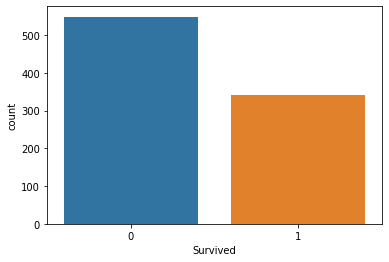

In [ ]:
#Plotting the sns chat 
sns.countplot(x = "Survived", data = df) 

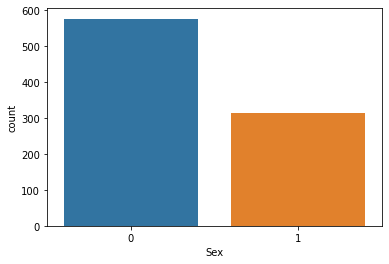

In [ ]:
sns.countplot(x = "Sex", data = df)

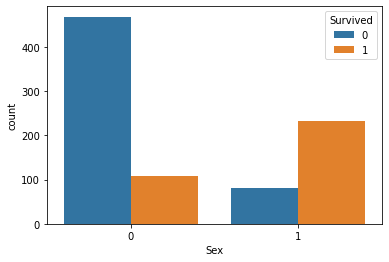

In [ ]:
sns.countplot(x = "Sex",hue = 'Survived', data = df)

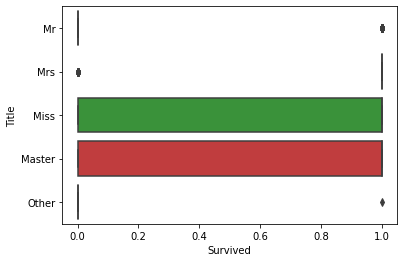

In [ ]:
sns.boxplot(x = 'Survived', y= 'Title',  data = df)

**MODEL BULDING**

In [ ]:
#importing the labries
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(["Survived"], axis = "columns")
Y = df["Survived"]

In [ ]:
X.shape , Y.shape

((891, 11), (891,))

In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Name_length,IsAlone,Title
PassengerId,,,,,,,,,,,
1,3,0,-0.600854,1,0,-0.503595,1,2,-0.434672,0,Mr
2,1,1,0.612019,1,0,0.734503,2,2,2.511806,0,Mrs
3,3,1,-0.297635,0,0,-0.490544,1,1,-0.539904,1,Miss
4,1,1,0.384606,1,0,0.382925,1,2,1.775186,0,Mrs
5,3,0,0.384606,0,0,-0.488127,1,1,-0.329441,1,Mr


In [ ]:
X = X.drop(['Title'], axis=1)

In [ ]:
#calling the train_test_split model
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression 

logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)


LogisticRegression()

In [ ]:
logistic_prediction = logisticmodel.predict(X_test)

In [ ]:
#print the result in csv file for the submitions 
#logistic_prediction.to_csv('/content/drive/MyDrive/my_titanic_result.csv', index_label=False)

AttributeError: ignored

In [ ]:
metrics.accuracy_score(y_test, logistic_prediction)

0.8044692737430168

# MODEL EVALUTION 

In [ ]:
def ConfusionMatrix(ytest, ypred, label = ['Negative', 'Positve']):
    from  sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest,ypred)
    plt.figure(figsize = (7, 5))
    sns.heatmap(cm, annot=True, cbar = False, fmt= 'd', cmap= 'winter')
    plt.xlabel('predicted', fontsize=15)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 15)
    plt.title('A Confusion Metrics');


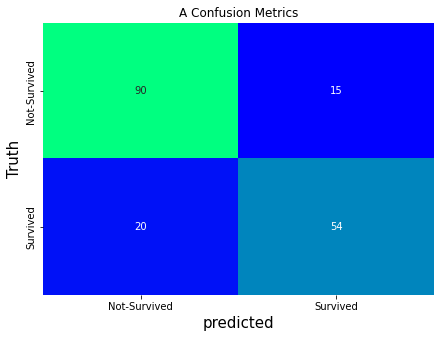

In [ ]:
ConfusionMatrix(y_test, logistic_prediction,  label= ["Not-Survived", "Survived"])

In [ ]:
#printing the F1 SCORE
from sklearn.metrics import f1_score
print(metrics.classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

